Most of the code comes from a sample from the book:
https://livebook.manning.com/book/deep-learning-with-python-second-edition


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

If you check the shape, you see that we have a training set of 60000 samples, with each a matrix of 28 by 28 data points (pixels). Every pixel has a value from 0 to 255. The train labels contain the numbers that have been written.

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

TypeError: Invalid shape (784,) for image data

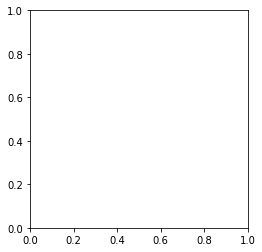

In [17]:
digit = test_images[0]
fig = plt.figure
plt.imshow(digit, cmap='gray')
plt.show()

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2546 - accuracy: 0.9277
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1042 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0680 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0490 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0372 - accuracy: 0.9893


In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.0098552e-09, 4.3228612e-11, 5.5307436e-07, 1.3753764e-05,
       1.6343537e-12, 1.4167157e-08, 6.4820534e-13, 9.9998534e-01,
       8.5717149e-09, 3.9826159e-07], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.99998534

In [15]:
test_labels[0]

7

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
print(f"test accuracy: {test_acc}, train accuracy: {history.history['accuracy'][4]}")